### Roadmap to Learn Data Analysis Using Python

- **Strong foundation in Python basics**
  - Programming fundamentals, variables, data types
  - Control structures (if, for, while)
  - Functions and scope
  - Containers: lists, tuples, dictionaries, sets
  - List/dictionary comprehensions
  - Basic error handling

- **NumPy**
  - Creating, indexing, and slicing arrays
  - Array operations and broadcasting
  - Mathematical and statistical functions
  - Reshaping and manipulating arrays

- **Pandas**
  - DataFrames and Series: creation and manipulation
  - Reading/writing data (CSV, Excel, etc.)
  - Data cleaning, handling missing data
  - Filtering, sorting, grouping, aggregation
  - Merging and joining datasets

- **Data Visualization**
  - Matplotlib: basic plots (line, bar, scatter, histogram)
  - Seaborn: advanced and statistical visualizations
  - Customizing plots and dashboards

- **Exploratory Data Analysis (EDA)**
  - Descriptive statistics (mean, median, mode, variance)
  - Outlier detection and handling
  - Feature engineering and transformation
  - Correlation analysis

- **Working with Real-world Data**
  - APIs and web data (using requests, BeautifulSoup, or Scrapy for web scraping)
  - Working with time series data (datetime module, pandas time-indexed data)

- **Statistical Analysis**
  - Probability concepts
  - Hypothesis testing
  - Using libraries like scipy.stats for statistical tests

- **Introduction to Machine Learning (optional but recommended)**
  - Scikit-learn basics: supervised and unsupervised learning
  - Data preprocessing for ML
  - Model evaluation (accuracy, confusion matrix, cross-validation)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data from a CSV file
df = pd.read_csv(r'coffee_sales.csv', header=3)
df.dropna(inplace=True, axis=1, how='all')

# # Clean data by converting 'Date' to datetime and Sales, Profit to numeric
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Profit'] = df['Profit'].str.replace('$', '', regex=False).astype(float)
df['Sales'] = df['Sales'].str.replace('$', '', regex=False).astype(float)
df['Target Sales'] = df['Target Sales'].str.replace('[$,]', '', regex=True).astype(float)
df['Target Profit'] = df['Target Profit'].str.replace('[$,]', '', regex=True).astype(float)

df["Target Status"] = np.where(df["Sales"] >= df["Target Sales"], "Achieved", "Not Achieved")

df.head()

,Date,Franchise,City,Product,Sales,Profit,Target Profit,Target Sales,Target Status
0,2021-01-01,M1,Mumbai,Amaretto,219.0,94.0,100.0,220.0,Not Achieved
1,2021-02-01,M1,Mumbai,Amaretto,140.0,34.0,50.0,140.0,Achieved
2,2021-03-01,M1,Mumbai,Amaretto,145.0,-2.0,30.0,180.0,Not Achieved
3,2021-04-01,M1,Mumbai,Amaretto,45.0,11.0,20.0,40.0,Achieved
4,2021-05-01,M1,Mumbai,Amaretto,120.0,13.0,30.0,120.0,Achieved


Ex. Visualise Target status frquency

<Axes: xlabel='Target Status'>

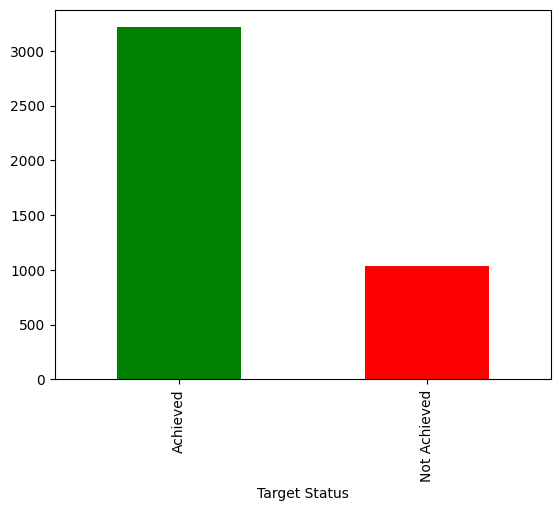

In [12]:
df.value_counts('Target Status').plot(kind='bar', color=['green', 'red'])

Ex. Descriptive statistics

In [14]:
df[["Sales", "Profit"]].describe().round(2)

,Sales,Profit
count,4248.00,4248.00
mean,192.99,61.10
std,151.13,101.71
min,17.00,-638.00
25%,100.00,17.00
50%,138.00,40.00
75%,230.00,92.00
max,912.00,778.00


Ex. Correlation bewteen Sales and Profit

In [18]:
df[["Sales", "Profit"]].corr().round(3)

,Sales,Profit
Sales,1.000,0.797
Profit,0.797,1.000


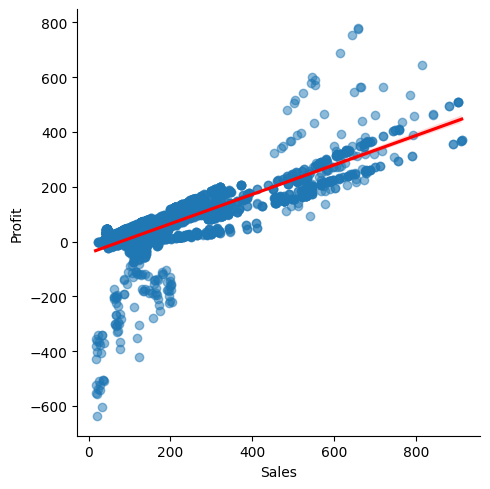

In [20]:
sns.lmplot(x='Sales', y='Profit', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})